In [172]:
import random
import numpy as np
import pandas as pd
from pandas import DataFrame
from numpy import linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from IPython.display import display, Markdown, Latex

## 1. Multivariate Linear Regression

(a)  
Hypothesis:  $$ h_{\theta}(x) = \theta_0+\theta_1 x_1 +...+\theta_n x_n $$
where $x$ are the input features and $\theta$ are the parameters of the model.

Cost function: $$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 $$
where m is the number of training examples.

Hessian Matrix: 
$$ H_f = 
\begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n}\\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n}\\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}
$$
where the (i,j)th element represents the second partial derivative of the function $f$ with respect to the ith and jth variables.

(b)  
The three methods differ in their approach to choosing the search direction and step size.

Gradient Descent method follows the direction of steepest descent as determined by the negative gradient of the function at each point. The step size is controlled by learning rate.

Steepest Descent is a variant of gradient descent where the step size is chosen to be the one that minimizes the objective function along the search direction. 

Conjugate Gradient method follows a conjugate direction that is orthogonal to all previous search directions. It will converge within N steps for a problem with N variables.

(c) Given 
$$A= 
\begin{pmatrix}
30 & 15 & 22\\
15 & 26 & 12\\
22 & 12 & 25
\end{pmatrix}, \quad
\textbf{b}=\begin{pmatrix}
8\\2\\6
\end{pmatrix}, \quad
c=12. $$

In [22]:
x0 = np.zeros((3, 1))
A = np.array([[30, 15, 22], [15, 26, 12], [22, 12, 25]])
b = np.array([[8], [2], [6]])
c = 12

In [23]:
def f(x, A, b, c):
    return 0.5*x.T.dot(A).dot(x) - b.T.dot(x) + c


def conj_grad(A, x, eps):
    steps = [(x[:, 0])]
    r = b - A.dot(x)
    p = r
    res = [r]
    conj = [p]
    rsold = r.T.dot(r)
    rs0 = rsold
    while rsold > eps**2 * rs0:
        # Update the steps
        Ap = A.dot(p)
        alpha = rsold / p.T.dot(Ap)
        x = x + alpha * p
        r = r - alpha * Ap
        rsnew = r.T.dot(r)
        p = r + (rsnew / rsold) * p
        rsold = rsnew

        # Save the steps
        steps.append((x[:, 0]))
        res.append(rsnew)
        conj.append(p)
    return x, steps, res, conj


In [32]:
eps = 0.01
x, steps, res, conj = conj_grad(A, x0, eps)
print('Local minimum occurs at {} with value {}.'.format( x[:, 0], f(x, A, b, c)[0, 0]))


Local minimum occurs at [ 0.30136986 -0.10958904  0.02739726] with value 10.821917808219178.


## 2. Logistic Regression and SVM

In [35]:
!git clone https://github.com/LeoisWTT/PHYS3151-Machine-Learning-in-Physics-2023

Cloning into 'PHYS3151-Machine-Learning-in-Physics-2023'...


In [ ]:
# Logistic regression
class LR:
    def __init__(self, x, y):
        # Generate X, theta, and y
        self.X = np.c_[np.ones((len(x), 1)), x]
        self.theta = np.zeros((self.X.shape[1], 1))
        self.y = y

    # Computes the gradient of the cost function at the point theta
    def gradient(self):
        m = self.X.shape[0]
        sigmoid = 1 / (1 + np.exp(-np.dot(self.X, self.theta)))
        return (1 / m) * np.dot(self.X.T, sigmoid-self.y)

    # Performs gradient descent to learn theta
    def fit(self, n_iter=1000):
        alpha = 0.5
        I = int(n_iter/3)
        for i in range(n_iter):
            # Reduce the learning rate by half every n_iter/3 iterations
            if i % I == 0:
                alpha /= 2
            self.theta = self.theta-alpha*self.gradient()
        return self.theta


In [71]:
df = pd.read_csv('./PHYS3151-Machine-Learning-in-Physics-2023/logistic-regression/iris-data.csv')
df = df[['sepal_length_cm', 'petal_width_cm', 'class']]
df = df.loc[df['class'].isin(['Iris-setosa', 'Iris-versicolor'])] 
df['class'] = np.where(df['class'] == 'Iris-setosa', 1, -1)
df.head(10)


,sepal_length_cm,petal_width_cm,class
0,5.1,0.2,1
1,4.9,0.2,1
2,4.7,0.2,1
3,4.6,0.2,1
4,5.0,0.2,1
5,5.4,0.4,1
6,4.6,0.3,1
7,5.0,0.2,1
8,4.4,0.2,1
9,4.9,0.1,1


In [130]:
# SVM Method
class SVM:
    def __init__(self, x, y):
        # Generate X, theta, and y
        self.X = np.c_[np.ones((len(x), 1)), x]
        self.theta = np.zeros((self.X.shape[1], 1))
        self.y = y

    def check(self):
        # Returns a matrix of 1s and 0s
        fx = np.multiply(self.y, (self.X.dot(self.theta)))
        check = np.less(fx, np.ones(fx.shape))
        check = np.where(check == True, 1, 0)
        return check

    def fit(self, n_iter=1000):
        m = float(self.y.shape[0])

        alpha = 0.5
        X, y = self.X, self.y
        for i in range(n_iter):

            I = int(n_iter/3)
            # Reduce the learning rate by half every iterations/3 iterations
            if i % I == 0:
                alpha /= 2
            self.theta = self.theta + alpha * \
                ((np.multiply(self.check(), y)).T.dot(X)).T
            self.theta[1:] = self.theta[1:] - alpha*self.theta[1:]/m

        return self.theta


In [131]:
n_iter = 1000  # number of iterations
model2 = SVM(df[['sepal_length_cm', 'petal_width_cm']].to_numpy(), df['class'].to_numpy().reshape(100,1))
w = model2.fit(n_iter)

In [132]:
x = np.arange(4,7.5,0.1)
y = -(w[1]/w[2])*x - w[0]/w[2]


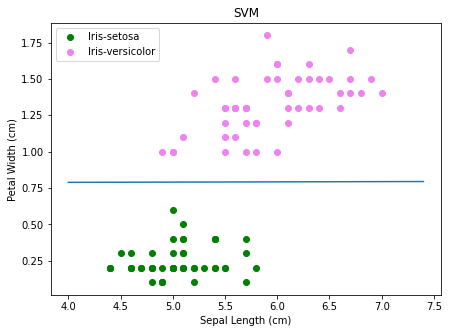

In [133]:
fig, ax = plt.subplots(figsize=(7, 5))
A = df.loc[df['class'] == 1]
B = df.loc[df['class'] == -1]
ax.scatter(A['sepal_length_cm'], A['petal_width_cm'], label='Iris-setosa', c='g')
ax.scatter(B['sepal_length_cm'], B['petal_width_cm'], label='Iris-versicolor', c='violet')
plt.plot(x,y)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('SVM')
plt.legend()
plt.show()


## 3. PCA and Clustering

(a) Compute the covariance matrix $\Sigma$. Then perform singular value decomposition on $\Sigma$ to get its eigenvalues and eigenvectors of $\Sigma$.

In [134]:
z = np.zeros(x.shape)
x_mean = np.mean(x, axis=0)
x_std = np.std(x, axis=0, ddof=0)
for i in range(100):
    z[:, i] = (x_mean[i]-x[:, i])

cov = np.cov(z, rowvar=False)
U, sigma, VT = la.svd(cov) # sigma is eigenvalue, U is eigenvector

print('The covariance matrix is: \n{}\n'.format(cov))
print('The eigenvalues are: {}\n'.format(sigma))
print('The eigenvectors are: {}\n'.format(U))


232


(b) Project the data onto the first three components and group the reduced data to three clusters using the K-means 
algorithm.

In [ ]:
def reduce_system(U, dimension):
    U_reduced = U[:, :dimension]
    reduced_vec = np.dot(z, U_reduced)
    var = np.sum(sigma[:dimension])/np.sum(sigma[:])
    return reduced_vec, var

In [ ]:
reducevec, vari = reduce_system(U, 3)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
p = ax.scatter(reducevec[:, 0], reducevec[:, 1],
               reducevec[:, 2], c=t, cmap="coolwarm")

ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
cb = fig.colorbar(p, shrink=0.55)
cb.set_label(label='$T$', labelpad=10)
plt.show()

In [ ]:
def K_mean(pc, K=3, jmax=10):
    # step 1 - choose 3 clusters at random
    # step 2 - select random point as centroids
    a = random.sample(range(0, len(pc)-1), K)
    Centroids = np.zeros((K, 3))
    for i in range(K):
        Centroids[i, 0] = pc[a[i]][0]
        Centroids[i, 1] = pc[a[i]][1]
        Centroids[i, 2] = pc[a[i]][2]
    diff = 1
    j = 0
    Centroids = pd.DataFrame(Centroids)
    Centroids.columns = ['pc1', 'pc2', 'pc3']
    principalComponents = pd.DataFrame(pc)
    principalComponents.columns = ['pc1', 'pc2', 'pc3']
    while (diff != 0):
        XD = principalComponents
        i = 1
    # step 3 - assign all the points to the closest cluster centroid
        for index1, row_c in Centroids.iterrows():
            ED = []
            for index2, row_d in XD.iterrows():
                d1 = (row_c["pc1"] - row_d["pc1"])**2
                d2 = (row_c["pc2"] - row_d["pc2"])**2
                d3 = (row_c["pc3"] - row_d["pc3"])**2
                d = np.sqrt(d1+d2+d3)
                ED.append(d)
            principalComponents[i] = ED
            i = i + 1

        C = []
        for index, row in principalComponents.iterrows():
            min_dist = row[1]
            pos = 1
            for i in range(K):
                if row[i+1] < min_dist:
                    min_dist = row[i+1]
                    pos = i + 1
            C.append(pos)
        principalComponents["Cluster"] = C
    # step 4 - recompute centroids of newly formed clusters
        Centroids_new = principalComponents.groupby(
            ["Cluster"]).mean()[["pc3", "pc2", "pc1"]]
    # step 5 - repeat 3 and 4
        if j == 0:
            diff = 1
            j = j+1
        elif j < jmax:
            diff = ((Centroids_new['pc3'] - Centroids['pc3'])**2).sum() + ((Centroids_new['pc2'] -
                                                                            Centroids['pc2'])**2).sum() + ((Centroids_new['pc1'] - Centroids['pc1'])**2).sum()
        else:
            diff = 0
        Centroids = principalComponents.groupby(["Cluster"]).mean()[
            ["pc3", "pc2", "pc1"]]
    return principalComponents, Centroids


In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

for k in range(K):
    data = principalComponents[principalComponents["Cluster"] == k+1]
    ax.scatter(data["pc1"], data["pc2"], data["pc3"], alpha=0.5)

ax.scatter(Centroids["pc1"], Centroids["pc2"], Centroids["pc3"], c='red')
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
plt.show()


## 4. Neural Networks

(a) Schematic plot of perceptron

(b) Denote the input layer as first layer, the hidden layer as second layer, and the output layer as third layer. The number of nodes in each layer is 2, 5, 1 respectively.

In [202]:
x = np.array([[3, 2], [5, 1]])
y = np.array([[2, 1]])
sizes = [2,5,1]

In [158]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))


def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))


In [204]:
num_layers = len(sizes)
biases = [np.ones((y, 1)) for y in sizes[1:]]
weights = [np.ones((y, x)) for x, y in zip(sizes[:-1], sizes[1:])]
nabla_b = [np.zeros(b.shape) for b in biases]
nabla_w = [np.zeros(w.shape) for w in weights]

activations = [x]  # list to store all the activations, layer by layer
zs = []            # list to store all the z vectors, layer by layer

a = x
m = x.shape[1]

# forward propogation
for b, w in zip(biases, weights):
    z = np.dot(w, a) + b
    zs.append(z)
    a = sigmoid(z)
    activations.append(a)


# backward propogation
delta = (activations[-1]-y)*sigmoid_prime(zs[-1])
nabla_b[-1] = np.sum(delta, axis=1, keepdims=True)
nabla_w[-1] = np.dot(delta, activations[-2].T)
for l in range(2, num_layers):
    delta = np.dot(weights[-l+1].T, delta) * sigmoid_prime(zs[-l])
    nabla_b[-l] = np.sum(delta, axis=1, keepdims=True)
    nabla_w[-l] = np.dot(delta, activations[-l-1].T)


In [215]:
for l, (nw, nb) in enumerate(zip(nabla_w, nabla_b)):
    for i in range(nw.shape[0]):
        text = '$$\\frac{{\\partial J}}{{\\partial \\Theta^{}_{{{}0}} }} = {:.5} \\quad'.format(
            l+1, i+1, nb[i][0])
        for j in range(nw.shape[1]):
            text += '\\frac{{\partial J}}{{\\partial \\Theta^{{ {} }}_{{ {} {} }} }}= {:.5} \\quad'.format(
                l+1, i+1, j+1, nw[i][j])
        display(Markdown(text+'$$'))


$$\frac{\partial J}{\partial \Theta^1_{10} } = -4.3411e-07 \quad\frac{\partial J}{\partial \Theta^{ 1 }_{ 1 1 } }= -1.1735e-06 \quad\frac{\partial J}{\partial \Theta^{ 1 }_{ 1 2 } }= -1.6551e-06 \quad$$

$$\frac{\partial J}{\partial \Theta^1_{20} } = -4.3411e-07 \quad\frac{\partial J}{\partial \Theta^{ 1 }_{ 2 1 } }= -1.1735e-06 \quad\frac{\partial J}{\partial \Theta^{ 1 }_{ 2 2 } }= -1.6551e-06 \quad$$

$$\frac{\partial J}{\partial \Theta^1_{30} } = -4.3411e-07 \quad\frac{\partial J}{\partial \Theta^{ 1 }_{ 3 1 } }= -1.1735e-06 \quad\frac{\partial J}{\partial \Theta^{ 1 }_{ 3 2 } }= -1.6551e-06 \quad$$

$$\frac{\partial J}{\partial \Theta^1_{40} } = -4.3411e-07 \quad\frac{\partial J}{\partial \Theta^{ 1 }_{ 4 1 } }= -1.1735e-06 \quad\frac{\partial J}{\partial \Theta^{ 1 }_{ 4 2 } }= -1.6551e-06 \quad$$

$$\frac{\partial J}{\partial \Theta^1_{50} } = -4.3411e-07 \quad\frac{\partial J}{\partial \Theta^{ 1 }_{ 5 1 } }= -1.1735e-06 \quad\frac{\partial J}{\partial \Theta^{ 1 }_{ 5 2 } }= -1.6551e-06 \quad$$

$$\frac{\partial J}{\partial \Theta^2_{10} } = -0.0024814 \quad\frac{\partial J}{\partial \Theta^{ 2 }_{ 1 1 } }= -0.002481 \quad\frac{\partial J}{\partial \Theta^{ 2 }_{ 1 2 } }= -0.002481 \quad\frac{\partial J}{\partial \Theta^{ 2 }_{ 1 3 } }= -0.002481 \quad\frac{\partial J}{\partial \Theta^{ 2 }_{ 1 4 } }= -0.002481 \quad\frac{\partial J}{\partial \Theta^{ 2 }_{ 1 5 } }= -0.002481 \quad$$